In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

import os, sys
sys.path.append("../")
import random

import CHARM.charm as charm
import CHARM.utils as utils

In [2]:
f1 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/NucleusImage4.tif"
f2 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage.tif"
f3 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/NucleusImage5.tif"
f4 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage4.tif"
f5 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage5.tif"

img1 = imread(f1).astype(np.single)
img2 = imread(f2).astype(np.single)
img3 = imread(f3).astype(np.single)
img4 = imread(f4).astype(np.single)
img5 = imread(f5).astype(np.single)

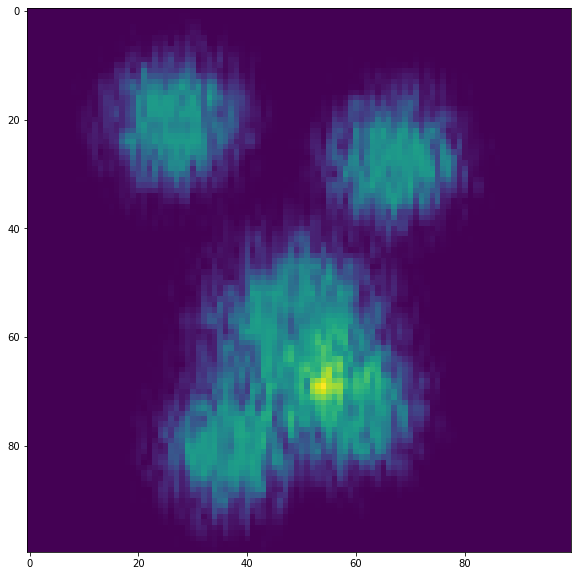

In [5]:
new1 = np.zeros((100, 100))
new2 = np.zeros((100, 100))
new3 = np.zeros((100, 100))
new4 = np.zeros((100, 100))
new5 = np.zeros((100, 100))

pos1_1 = random.randint(0, 15)
pos1_2 = random.randint(0, 15)
new1[pos1_1:40 + pos1_1, pos1_2:40 + pos1_2] = img1[23:63, 30:70]
pos2_1 = random.randint(0, 35)
new2[pos2_1:55 + pos2_1, 20:75] = img2[45:100, 25:80]
pos3_1 = random.randint(0, 15)
pos3_2 = random.randint(0, 15)
new3[pos3_1:40 + pos3_1, 40 + pos3_2:80 + pos3_2] = img3[23:63, 35:75]
pos4_1 = random.randint(0, 20)
pos4_2 = random.randint(0, 25)
new4[40 + pos4_1:80 + pos4_1, pos4_2:40 + pos4_2] = img4[33:73, 60:100]
pos5_1 = random.randint(0, 20)
pos5_2 = random.randint(0, 20)
new5[40 + pos5_1:80 + pos5_1, 40 + pos5_2:80 + pos5_2] = img5[55:95, 53:93]

plt.figure(figsize=(10, 10))
plt.imshow(new1 + new2 + new3 + new4 + new5)
plt.show()

In [6]:
measured_img1 = new1 + 0.4 * new2 + 0.3 * new3 + 0.2 * new4 + 0.1 * new5
measured_img2 = 0.4 * new1 + new2 + 0.4 * new3 + 0.3 * new4 + 0.2 * new5
measured_img3 = 0.3 * new1 + 0.3 * new2 + new3 + 0.4 * new4 + 0.3 * new5
measured_img4 = 0.2 * new1 + 0.2 * new2 + 0.3 * new3 + new4 + 0.4 * new5
measured_img5 = 0.1 * new1 + 0.1 * new2 + 0.2 * new3 + 0.4 * new4 + new5

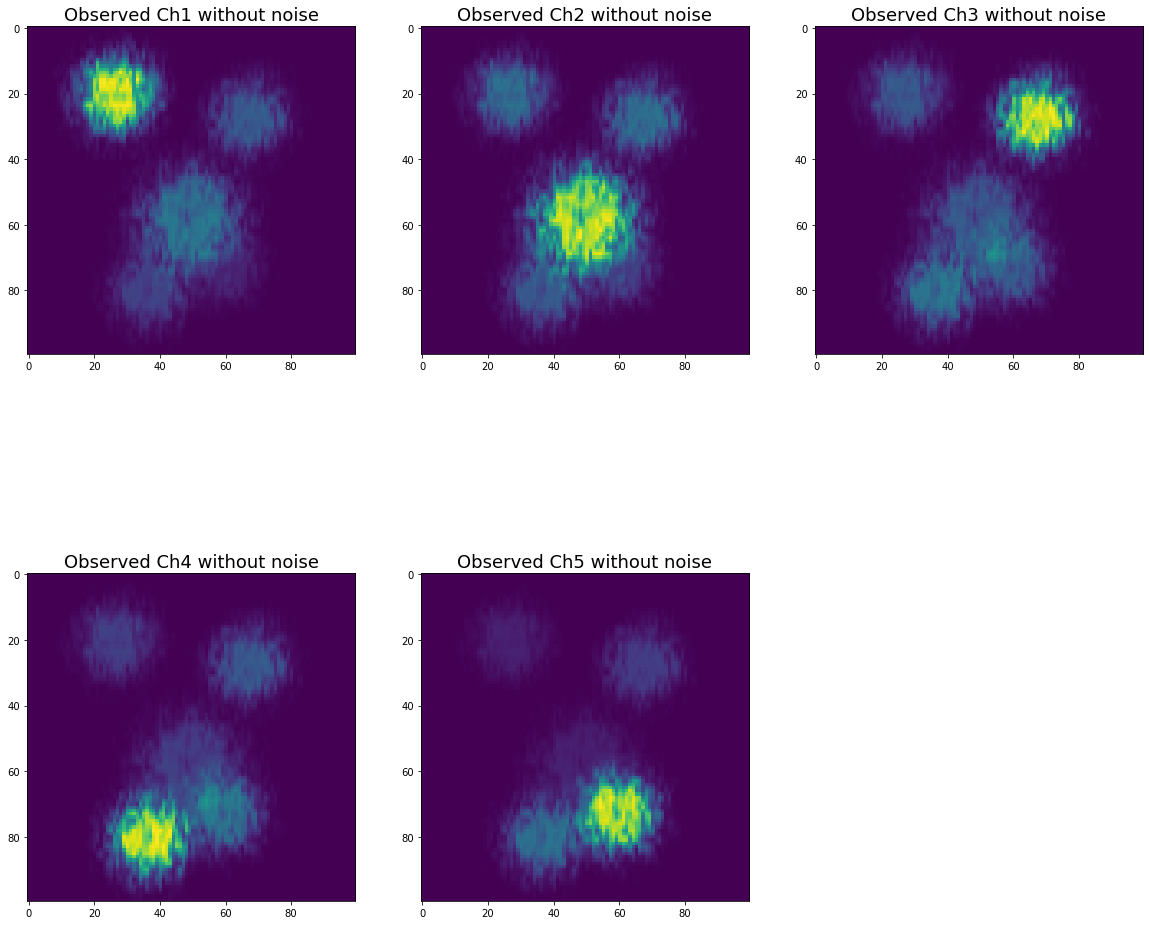

In [7]:
IMG = [measured_img1, measured_img2, measured_img3, measured_img4, measured_img5]

fig, ax = plt.subplots(2, 3, figsize = (20, 20))
plt.subplots_adjust(hspace=0.01)

for i in range(5):
    row = i//3
    col = i % 3
    ax[row][col].imshow(IMG[i])
    ax[row][col].set_title(f'Observed Ch{i + 1} without noise', size = 18)

fig.delaxes(ax[1][2])
plt.show()

In [8]:
new1_noise = utils.add_noise(new1, 10, 4).astype(np.single)
new2_noise = utils.add_noise(new2, 10, 20).astype(np.single)
new3_noise = utils.add_noise(new3, 10, 33).astype(np.single)
new4_noise = utils.add_noise(new4, 10, 345).astype(np.single)
new5_noise = utils.add_noise(new5, 10, 425).astype(np.single)

In [9]:
img1_noise = utils.add_noise(measured_img1, 10, 32).astype(np.single)
img1_noise[img1_noise > 255.0] = 255.0
img2_noise = utils.add_noise(measured_img2, 10, 23).astype(np.single)
img2_noise[img2_noise > 255.0] = 255.0
img3_noise = utils.add_noise(measured_img3, 10, 33).astype(np.single)
img3_noise[img3_noise > 255.0] = 255.0
img4_noise = utils.add_noise(measured_img4, 10, 2).astype(np.single)
img4_noise[img4_noise > 255.0] = 255.0
img5_noise = utils.add_noise(measured_img5, 10, 3).astype(np.single)
img5_noise[img5_noise > 255.0] = 255.0

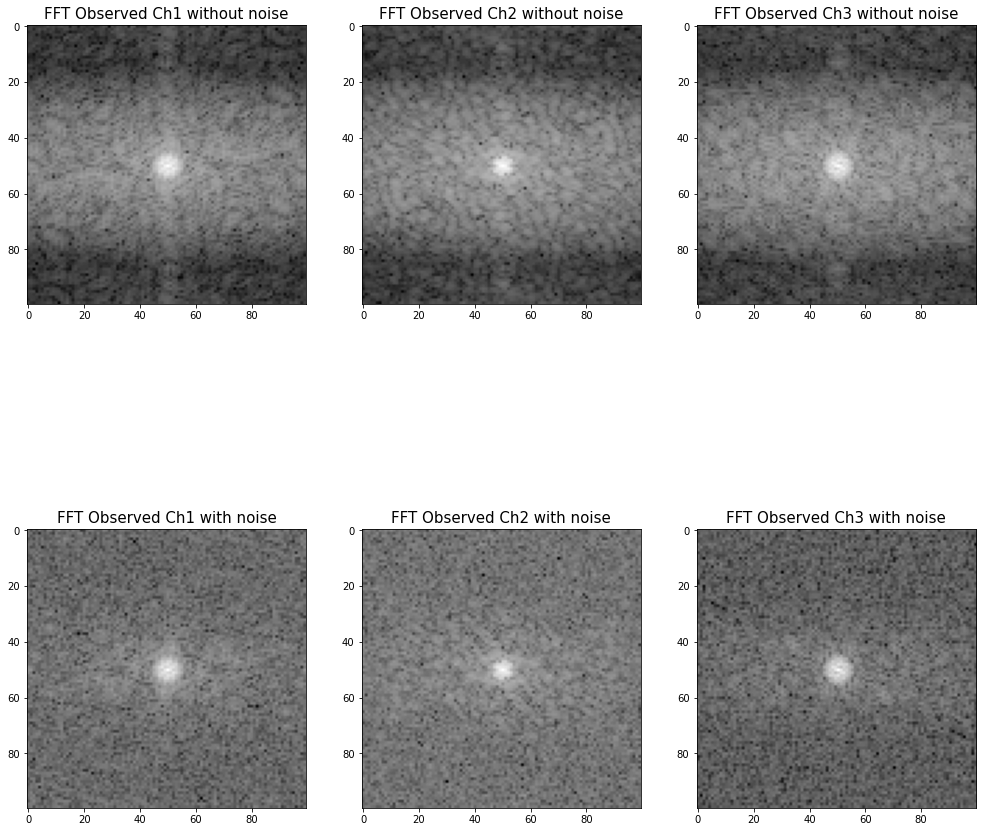

In [10]:
ch1_shifted, f_trans_ch1 = utils.Fourier_Trans(measured_img1)
ch2_shifted, f_trans_ch2 = utils.Fourier_Trans(measured_img2)
ch3_shifted, f_trans_ch3 = utils.Fourier_Trans(measured_img3)
ch4_shifted, f_trans_ch4 = utils.Fourier_Trans(measured_img4)
ch5_shifted, f_trans_ch5 = utils.Fourier_Trans(measured_img5)

noi_ch1_shifted, f_trans_noi_ch1 = utils.Fourier_Trans(img1_noise)
noi_ch2_shifted, f_trans_noi_ch2 = utils.Fourier_Trans(img2_noise)
noi_ch3_shifted, f_trans_noi_ch3 = utils.Fourier_Trans(img3_noise)
noi_ch4_shifted, f_trans_noi_ch4 = utils.Fourier_Trans(img4_noise)
noi_ch5_shifted, f_trans_noi_ch5 = utils.Fourier_Trans(img5_noise)

plt.figure(figsize=(17, 17))
plt.subplot(231)
plt.imshow(f_trans_ch1, cmap='gray')
plt.title('FFT Observed Ch1 without noise', size = 15)
plt.subplot(232)
plt.imshow(f_trans_ch2, cmap='gray')
plt.title('FFT Observed Ch2 without noise', size = 15)
plt.subplot(233)
plt.imshow(f_trans_ch3, cmap='gray')
plt.title('FFT Observed Ch3 without noise', size = 15)
plt.subplot(234)
plt.imshow(f_trans_noi_ch1, cmap='gray')
plt.title('FFT Observed Ch1 with noise', size = 15)
plt.subplot(235)
plt.imshow(f_trans_noi_ch2, cmap='gray')
plt.title('FFT Observed Ch2 with noise', size = 15)
plt.subplot(236)
plt.imshow(f_trans_noi_ch3, cmap='gray')
plt.title('FFT Observed Ch3 with noise', size = 15)
plt.show()

In [11]:
low_pass = utils.low_pass_filter(img1_noise, 6)

f_trans_ch1_filtered = low_pass * ch1_shifted
f_trans_ch2_filtered = low_pass * ch2_shifted
f_trans_ch3_filtered = low_pass * ch3_shifted
f_trans_ch4_filtered = low_pass * ch4_shifted
f_trans_ch5_filtered = low_pass * ch5_shifted

f_trans_noi_ch1_filtered = low_pass * noi_ch1_shifted
f_trans_noi_ch2_filtered = low_pass * noi_ch2_shifted
f_trans_noi_ch3_filtered = low_pass * noi_ch3_shifted
f_trans_noi_ch4_filtered = low_pass * noi_ch4_shifted
f_trans_noi_ch5_filtered = low_pass * noi_ch5_shifted

In [12]:
f_ishifted_noi_ch1 = np.fft.ifftshift(f_trans_noi_ch1_filtered)
img_filtered_noi_ch1 = np.fft.ifft2(f_ishifted_noi_ch1)
img_filtered_noi_ch1= np.abs(img_filtered_noi_ch1)

f_ishifted_noi_ch2 = np.fft.ifftshift(f_trans_noi_ch2_filtered)
img_filtered_noi_ch2 = np.fft.ifft2(f_ishifted_noi_ch2)
img_filtered_noi_ch2= np.abs(img_filtered_noi_ch2)

f_ishifted_noi_ch3 = np.fft.ifftshift(f_trans_noi_ch3_filtered)
img_filtered_noi_ch3 = np.fft.ifft2(f_ishifted_noi_ch3)
img_filtered_noi_ch3= np.abs(img_filtered_noi_ch3)

f_ishifted_noi_ch4 = np.fft.ifftshift(f_trans_noi_ch4_filtered)
img_filtered_noi_ch4 = np.fft.ifft2(f_ishifted_noi_ch4)
img_filtered_noi_ch4= np.abs(img_filtered_noi_ch4)

f_ishifted_noi_ch5 = np.fft.ifftshift(f_trans_noi_ch5_filtered)
img_filtered_noi_ch5 = np.fft.ifft2(f_ishifted_noi_ch5)
img_filtered_noi_ch5= np.abs(img_filtered_noi_ch5)

In [13]:
merge_img = np.stack((img_filtered_noi_ch1, img_filtered_noi_ch2, img_filtered_noi_ch3, img_filtered_noi_ch4, img_filtered_noi_ch5), axis = -1)

CHARM = charm.charm(5, 5, [5, 5])
choped_img = CHARM.create_chopedImg(merge_img)

mean_intensity = np.mean(choped_img, axis = (2, 3))
mean_intensity

array([[3.33660449, 3.91334187, 3.12628251, ..., 2.43858493, 3.30919161,
        3.68637403],
       [3.3425575 , 4.0994964 , 3.54899966, ..., 2.15043967, 3.14566157,
        5.0091774 ],
       [2.58689443, 2.67594016, 2.69002648, ..., 2.87707221, 4.21627757,
        4.45404297],
       [2.61116266, 2.09581613, 2.29952971, ..., 2.49383301, 3.89867328,
        4.33893455],
       [3.20370642, 2.59467866, 2.6157258 , ..., 2.13178476, 2.70804203,
        3.22486772]])

In [14]:
max_values_indices = np.argmax(mean_intensity, axis=0)  # Indices of max values in each column
print(max_values_indices)

[1 1 1 4 3 1 3 4 4 1 2 2 4 1 1 1 1 1 1 3 4 1 1 0 0 0 0 0 3 1 1 1 1 1 1 2 1
 1 1 4 2 1 0 0 0 0 0 0 0 1 1 0 2 2 2 2 1 1 2 2 1 1 0 0 0 0 0 0 0 3 3 2 2 2
 2 2 1 1 2 1 1 4 0 0 0 0 0 0 0 3 2 2 2 2 2 2 2 0 1 1 0 1 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 0 4 4 0 1 1 0 0 0 0 0 4 4 2 2 2 2 2 2 2 1 1 2 1 1 1 3 0 0 0 4
 1 1 1 2 2 2 2 2 2 1 1 2 1 0 0 3 1 1 4 1 1 1 1 1 2 2 2 1 4 2 2 1 3 3 1 1 1
 2 1 1 1 1 1 1 1 1 3 1 1 2 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 4
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 4 3 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4 2
 1 1 3 3 1 1 3 1 1 1 1 1 4 4 4 4 1 1 4 4 1 1 3 3 1 3 3 3 3 3 1 4 4 4 4 4 4
 1 1 1 1 1 1 3 3 3 3 3 3 3 3 4 4 4 4 4 1 1 1 1 1 4 1 1 3 3 3 3 3 3 3 4 4 4
 4 4 0 3 1 1 1 4 1 1 1 3 3 3 3 3 3 4 4 4 4 2 3 3 1 1 4 1 1 3 1 0 3 3 3 3 3
 1 1 1 2 2 3 4 2 2 1 1 0 0 2 1 1 3 3 3 1 2 2 2 1 1 1 1 2 2 1]


# Channel 1 Spillover

In [15]:
max_index = 0
valid_col = CHARM.algorithm(max_values_indices, max_index, mean_intensity)

Column 25 satisfies the condition.
Column 42 satisfies the condition.
Column 43 satisfies the condition.
Column 44 satisfies the condition.
Column 45 satisfies the condition.
Column 46 satisfies the condition.
Column 47 satisfies the condition.
Column 62 satisfies the condition.
Column 63 satisfies the condition.
Column 64 satisfies the condition.
Column 65 satisfies the condition.
Column 66 satisfies the condition.
Column 67 satisfies the condition.
Column 68 satisfies the condition.
Column 82 satisfies the condition.
Column 83 satisfies the condition.
Column 84 satisfies the condition.
Column 85 satisfies the condition.
Column 86 satisfies the condition.
Column 87 satisfies the condition.
Column 88 satisfies the condition.
Column 103 satisfies the condition.
Column 104 satisfies the condition.
Column 105 satisfies the condition.
Column 106 satisfies the condition.
Column 107 satisfies the condition.
Column 123 satisfies the condition.
Column 124 satisfies the condition.
Column 125 sa

In [16]:
alpha_21 = [mean_intensity[1,col]/mean_intensity[0, col] for col in valid_col if mean_intensity[0, col] > 20]
alpha_31 = [mean_intensity[2,col]/mean_intensity[0, col] for col in valid_col if mean_intensity[0, col] > 20]
alpha_41 = [mean_intensity[3,col]/mean_intensity[0, col] for col in valid_col if mean_intensity[0, col] > 20]
alpha_51 = [mean_intensity[4,col]/mean_intensity[0, col] for col in valid_col if mean_intensity[0, col] > 20]
print(np.min(alpha_21), np.min(alpha_31), np.min(alpha_41), np.min(alpha_51))

0.3748722714897147 0.2903462302055697 0.17808518865287615 0.09035266222793871


# Channel 2 Spillover

In [17]:
max_index = 1
valid_col = CHARM.algorithm(max_values_indices, max_index, mean_intensity)

Column 15 satisfies the condition.
Column 16 satisfies the condition.
Column 17 satisfies the condition.
Column 34 satisfies the condition.
Column 36 satisfies the condition.
Column 37 satisfies the condition.
Column 38 satisfies the condition.
Column 49 satisfies the condition.
Column 57 satisfies the condition.
Column 76 satisfies the condition.
Column 79 satisfies the condition.
Column 99 satisfies the condition.
Column 121 satisfies the condition.
Column 138 satisfies the condition.
Column 141 satisfies the condition.
Column 158 satisfies the condition.
Column 164 satisfies the condition.
Column 168 satisfies the condition.
Column 169 satisfies the condition.
Column 170 satisfies the condition.
Column 171 satisfies the condition.
Column 175 satisfies the condition.
Column 183 satisfies the condition.
Column 184 satisfies the condition.
Column 187 satisfies the condition.
Column 188 satisfies the condition.
Column 189 satisfies the condition.
Column 190 satisfies the condition.
Colu

In [18]:
alpha_12 = [mean_intensity[0,col]/mean_intensity[1, col] for col in valid_col if mean_intensity[1, col] > 20]
alpha_32 = [mean_intensity[2,col]/mean_intensity[1, col] for col in valid_col if mean_intensity[1, col] > 20]
alpha_42 = [mean_intensity[3,col]/mean_intensity[1, col] for col in valid_col if mean_intensity[1, col] > 20]
alpha_52 = [mean_intensity[4,col]/mean_intensity[1, col] for col in valid_col if mean_intensity[1, col] > 20]
print(np.min(alpha_12), np.min(alpha_32), np.min(alpha_42), np.min(alpha_52))

0.3784258742079113 0.2781069689280352 0.17119992143721852 0.08414431114399656


# Channel 3 Spillover

In [19]:
max_index = 2
valid_col = CHARM.algorithm(max_values_indices, max_index, mean_intensity)

Column 35 satisfies the condition.
Column 54 satisfies the condition.
Column 55 satisfies the condition.
Column 58 satisfies the condition.
Column 72 satisfies the condition.
Column 73 satisfies the condition.
Column 74 satisfies the condition.
Column 75 satisfies the condition.
Column 78 satisfies the condition.
Column 90 satisfies the condition.
Column 91 satisfies the condition.
Column 92 satisfies the condition.
Column 93 satisfies the condition.
Column 94 satisfies the condition.
Column 95 satisfies the condition.
Column 96 satisfies the condition.
Column 110 satisfies the condition.
Column 111 satisfies the condition.
Column 112 satisfies the condition.
Column 113 satisfies the condition.
Column 114 satisfies the condition.
Column 115 satisfies the condition.
Column 116 satisfies the condition.
Column 130 satisfies the condition.
Column 131 satisfies the condition.
Column 132 satisfies the condition.
Column 133 satisfies the condition.
Column 134 satisfies the condition.
Column 1

In [20]:
alpha_13 = [mean_intensity[0,col]/mean_intensity[2, col] for col in valid_col if mean_intensity[2, col] > 20]
alpha_23 = [mean_intensity[1,col]/mean_intensity[2, col] for col in valid_col if mean_intensity[2, col] > 20]
alpha_43 = [mean_intensity[3,col]/mean_intensity[2, col] for col in valid_col if mean_intensity[2, col] > 20]
alpha_53 = [mean_intensity[4,col]/mean_intensity[2, col] for col in valid_col if mean_intensity[2, col] > 20]
print(np.min(alpha_13), np.min(alpha_23), np.min(alpha_43), np.min(alpha_53))

0.2575880498017766 0.3750920240730317 0.28275166221520726 0.17779107115323975


# Channel 4 Spillover

In [21]:
max_index = 3
valid_col = CHARM.algorithm(max_values_indices, max_index, mean_intensity)

Column 28 satisfies the condition.
Column 285 satisfies the condition.
Column 286 satisfies the condition.
Column 302 satisfies the condition.
Column 303 satisfies the condition.
Column 304 satisfies the condition.
Column 305 satisfies the condition.
Column 306 satisfies the condition.
Column 307 satisfies the condition.
Column 308 satisfies the condition.
Column 323 satisfies the condition.
Column 324 satisfies the condition.
Column 325 satisfies the condition.
Column 326 satisfies the condition.
Column 327 satisfies the condition.
Column 328 satisfies the condition.
Column 329 satisfies the condition.
Column 345 satisfies the condition.
Column 346 satisfies the condition.
Column 347 satisfies the condition.
Column 348 satisfies the condition.
Column 349 satisfies the condition.
Column 366 satisfies the condition.
Column 367 satisfies the condition.
Column 368 satisfies the condition.
Column 387 satisfies the condition.


In [22]:
alpha_14 = [mean_intensity[0,col]/mean_intensity[3, col] for col in valid_col if mean_intensity[3, col] > 20]
alpha_24 = [mean_intensity[1,col]/mean_intensity[3, col] for col in valid_col if mean_intensity[3, col] > 20]
alpha_34 = [mean_intensity[2,col]/mean_intensity[3, col] for col in valid_col if mean_intensity[3, col] > 20]
alpha_54 = [mean_intensity[4,col]/mean_intensity[3, col] for col in valid_col if mean_intensity[3, col] > 20]
print(min(alpha_14), min(alpha_24), min(alpha_34), min(alpha_54))

0.19047274036755948 0.28213127797041826 0.36575073189943097 0.386557311374343


# Channel 5 Spillover

In [23]:
max_index = 4
valid_col = CHARM.algorithm(max_values_indices, max_index, mean_intensity)

Column 147 satisfies the condition.
Column 166 satisfies the condition.
Column 274 satisfies the condition.
Column 292 satisfies the condition.
Column 293 satisfies the condition.
Column 311 satisfies the condition.
Column 312 satisfies the condition.
Column 313 satisfies the condition.
Column 330 satisfies the condition.
Column 331 satisfies the condition.
Column 332 satisfies the condition.
Column 333 satisfies the condition.


In [24]:
alpha_15 = [mean_intensity[0,col]/mean_intensity[4, col] for col in valid_col if mean_intensity[4, col] > 20]
alpha_25 = [mean_intensity[1,col]/mean_intensity[4, col] for col in valid_col if mean_intensity[4, col] > 20]
alpha_35 = [mean_intensity[2,col]/mean_intensity[4, col] for col in valid_col if mean_intensity[4, col] > 20]
alpha_45 = [mean_intensity[3,col]/mean_intensity[4, col] for col in valid_col if mean_intensity[4, col] > 20]
print(min(alpha_15), min(alpha_25), min(alpha_35), min(alpha_45))

0.08943871088907926 0.1561680649289941 0.26763232051714886 0.35699684942906834
